### Step 1: import all lab

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Step 2 : Load Dataset

In [80]:
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [61]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Step 3: Data Cleaning, Data Preprocessing

In [62]:
df_train.shape

(1460, 81)

In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### missing value treatment on train dataset

In [69]:
df_train_Nan_dict={}
for i in df_train.columns:
  if df_train[i].isna().sum()!=0:
    df_train_Nan_dict[i]=df_train[i].isna().sum()
print('train NaN columns:',df_train_Nan_dict)

train NaN columns: {'LotFrontage': 259, 'Alley': 1369, 'MasVnrType': 8, 'MasVnrArea': 8, 'BsmtQual': 37, 'BsmtCond': 37, 'BsmtExposure': 38, 'BsmtFinType1': 37, 'BsmtFinType2': 38, 'Electrical': 1, 'FireplaceQu': 690, 'GarageType': 81, 'GarageYrBlt': 81, 'GarageFinish': 81, 'GarageQual': 81, 'GarageCond': 81, 'PoolQC': 1453, 'Fence': 1179, 'MiscFeature': 1406}


- drop the column which have more than 200 missing value.
- fill missing value in other column

In [72]:
df_train = df_train.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

In [73]:
df_train.shape

(1460, 75)

In [75]:
df_train['MasVnrType'] = df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])

In [76]:
df_train['BsmtQual'] = df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])
df_train['BsmtCond'] = df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])
df_train['BsmtExposure'] = df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])
df_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0])
df_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0])
df_train['Electrical'] = df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])
df_train['GarageType'] = df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])
df_train['GarageFinish'] = df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0])
df_train['GarageQual'] = df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0])
df_train['GarageCond'] = df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0])
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mode()[0])

df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean())

#### missing value treatment on test dataset

In [81]:
df_test.shape

(1459, 80)

In [86]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotArea        1459 non-null   int64  
 4   Street         1459 non-null   object 
 5   LotShape       1459 non-null   object 
 6   LandContour    1459 non-null   object 
 7   Utilities      1457 non-null   object 
 8   LotConfig      1459 non-null   object 
 9   LandSlope      1459 non-null   object 
 10  Neighborhood   1459 non-null   object 
 11  Condition1     1459 non-null   object 
 12  Condition2     1459 non-null   object 
 13  BldgType       1459 non-null   object 
 14  HouseStyle     1459 non-null   object 
 15  OverallQual    1459 non-null   int64  
 16  OverallCond    1459 non-null   int64  
 17  YearBuilt      1459 non-null   int64  
 18  YearRemo

In [85]:
df_test_Nan_dict={}
for i in df_test.columns:
  if df_test[i].isna().sum()!=0:
    df_test_Nan_dict[i]=df_test[i].isna().sum()
print('test NaN columns:',df_test_Nan_dict)


test NaN columns: {'MSZoning': 4, 'Utilities': 2, 'Exterior1st': 1, 'Exterior2nd': 1, 'MasVnrType': 16, 'MasVnrArea': 15, 'BsmtQual': 44, 'BsmtCond': 45, 'BsmtExposure': 44, 'BsmtFinType1': 42, 'BsmtFinSF1': 1, 'BsmtFinType2': 42, 'BsmtFinSF2': 1, 'BsmtUnfSF': 1, 'TotalBsmtSF': 1, 'BsmtFullBath': 2, 'BsmtHalfBath': 2, 'KitchenQual': 1, 'Functional': 2, 'GarageType': 76, 'GarageYrBlt': 78, 'GarageFinish': 78, 'GarageCars': 1, 'GarageArea': 1, 'GarageQual': 78, 'GarageCond': 78, 'SaleType': 1}


- drop the column which have more than 200 missing value.
- fill missing value in other column

In [83]:
df_test = df_test.drop(['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1)

In [84]:
df_test.shape

(1459, 74)

- missing value treatment

In [87]:
df_test['MSZoning'] = df_test['MSZoning'].fillna(df_test['MSZoning'].mode()[0])
df_test['Utilities'] = df_test['Utilities'].fillna(df_test['Utilities'].mode()[0])
df_test['Exterior1st'] = df_test['Exterior1st'].fillna(df_test['Exterior1st'].mode()[0])
df_test['Exterior2nd'] = df_test['Exterior2nd'].fillna(df_test['Exterior2nd'].mode()[0])
df_test['MasVnrType'] = df_test['MasVnrType'].fillna(df_test['MasVnrType'].mode()[0])
df_test['BsmtQual'] = df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])
df_test['BsmtCond'] = df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])
df_test['BsmtExposure'] = df_test['BsmtExposure'].fillna(df_test['BsmtExposure'].mode()[0])
df_test['BsmtFinType1'] = df_test['BsmtFinType1'].fillna(df_test['BsmtFinType1'].mode()[0])
df_test['BsmtFinType2'] = df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])
df_test['GarageType'] = df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])
df_test['GarageFinish'] = df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])
df_test['GarageQual'] = df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])
df_test['GarageCond'] = df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])
df_test['GarageYrBlt'] = df_test['GarageYrBlt'].fillna(df_test['GarageYrBlt'].mode()[0])


df_test['MasVnrArea'] = df_test['MasVnrArea'].fillna(df_test['MasVnrArea'].mean())
df_test['BsmtFinSF1'] = df_test['BsmtFinSF1'].fillna(df_test['BsmtFinSF1'].mean())
df_test['BsmtFinSF2'] = df_test['BsmtFinSF2'].fillna(df_test['BsmtFinSF2'].mean())

In [91]:
df_test['SaleType'] = df_test['SaleType'].fillna(df_test['SaleType'].mode()[0])

- check connection/ relation

In [93]:
high_corr = df_train.corr()["SalePrice"].sort_values(ascending=False)[0:11].index

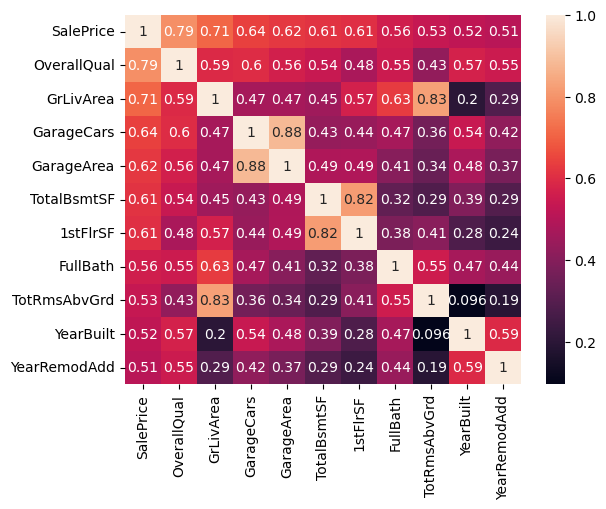

In [94]:
sns.heatmap(df_train[high_corr].corr(), annot=True);

In [ ]:
#### Step 4: Split data into x and y

In [96]:
x= df_train[high_corr[1:]]
y = df_train.SalePrice

In [104]:
x

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1710,2,548,856,856,2,8,2003,2003
1,6,1262,2,460,1262,1262,2,6,1976,1976
2,7,1786,2,608,920,920,2,6,2001,2002
3,7,1717,3,642,756,961,1,7,1915,1970
4,8,2198,3,836,1145,1145,2,9,2000,2000
...,...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,7,1999,2000
1456,6,2073,2,500,1542,2073,2,7,1978,1988
1457,7,2340,1,252,1152,1188,2,9,1941,2006
1458,5,1078,1,240,1078,1078,1,5,1950,1996


In [ ]:
#### Step 5: split data into train ans test set

In [100]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#### Step 6: Apply LR algorithm

In [101]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [102]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
#### Step 7: Prediction

In [103]:
y_pred = lr.predict(x_test)
y_pred

array([265234.81426194, 147042.36620358, 111990.35647764, 225968.78975483,
       120266.46808507, 116340.99581376, 256811.47058559, 142937.76815401,
       493335.56722748, 163465.08372224, 213600.21571103, 194179.31126711,
       228376.66562224, 105379.70890343, 130235.91563972, 143659.6966446 ,
       217682.86587692, 101908.91916542, 151932.4696311 , 188006.30695675,
       137527.61071313, 150177.05671016, 107539.5947871 , 162106.88328248,
       188747.97960944, 197176.92385272, 178020.9320047 ,  51167.31146076,
       297244.93814264, 112719.08607759, 203141.97730315, 203520.6081454 ,
       141411.78639152, 282391.10418274, 319078.43995775, 182535.19627312,
       272092.07755576, 117570.68932496, 240238.08566125, 311105.37954934,
       233644.16084933, 129105.29841013, 205003.23782   , 296582.25765003,
       327745.36038725, 181147.26350618, 125706.2107922 , 112895.82702366,
       176625.5140797 ,  70227.01014376, 343136.62993567, 134440.00112647,
       182771.34461237,  

In [ ]:
#### Step 8 : Evaluation

In [106]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_pred, y_test)
accuracy

0.6128804724941801

In [111]:
lr.score(x_train, y_train)

0.8043811062067858

In [112]:
lr.score(x_test,y_test)

0.6378088587169507

In [108]:
m = lr.coef_
m

array([ 1.74630539e+04,  5.86198191e+01,  2.04749307e+03,  4.13012310e+01,
        3.17031500e+01,  1.21461139e+01, -8.51930343e+03, -6.23891841e+02,
        2.87541740e+02,  3.27980788e+02])

In [110]:
c = lr.intercept_
c

-1285428.8289250154